# Australia Weather Data Cleaning and Extraction Code
## Author Kiana Gonzalez-Rodholm
## 6/2/2021

## Cleaning/Formatting Flat File Source

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read original csv file
flat_df = pd.read_csv('weatherAUS.csv')
flat_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 1. Replacing Headers

In [40]:
# rename columns
columns = {'Date':'date', 'Location':'location', 'MinTemp':'min_temp', 'MaxTemp':'max_temp', 'Rainfall':'rainfall', 
           'WindGustSpeed':'wind_speed', 'Temp9am':'temp_9am', 'Temp3pm':'temp_3pm', 'RainToday':'rain_today', 'RainTomorrow':'rain_tomorrow'}
flat_df.rename(columns=columns, inplace=True)

### 2. Removing Unnessesary Columns to Make More Readable

In [43]:
# gather a subset df with relevant columns
flat_df1 = flat_df[['date', 'location', 'min_temp', 'max_temp', 'rainfall', 'wind_speed', 'temp_9am', 'temp_3pm', 'rain_today', 'rain_tomorrow']]
flat_df1.head()

,date,location,min_temp,max_temp,rainfall,wind_speed,temp_9am,temp_3pm,rain_today,rain_tomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,17.8,29.7,No,No


### 3. Removing Missing Data

In [44]:
# Check if any essential column contains NaN 
print("NaN values in Location: {}".format(flat_df1.location.isnull().values.any()))
print("NaN values in Date: {}".format(flat_df1.date.isnull().values.any()))
print("NaN values in Min Temp: {}".format(flat_df1.min_temp.isnull().values.any()))
print("NaN values in Max Temp: {}".format(flat_df1.max_temp.isnull().values.any()))

# there is no missing locations or dates with NaN which is good, however there is some in min and max temp

NaN values in Location: False
NaN values in Date: False
NaN values in Min Temp: True
NaN values in Max Temp: True


In [45]:
# check size of rows before removing NaN values
flat_df1_before = flat_df1.shape

# remove NaN values from min temp and max temp
flat_df1 = flat_df1[np.isfinite(flat_df1['min_temp'])]
flat_df1 = flat_df1[np.isfinite(flat_df1['max_temp'])]

# check size of rows after removing NaN values
flat_df1_after = flat_df1.shape

# print results
print("The size of data went from {} rows to {} rows when removing NaN values.".format(flat_df1_before[0],flat_df1_after[0]))

The size of data went from 145460 rows to 143579 rows when removing NaN values.


### 4. Identifying and Removing Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

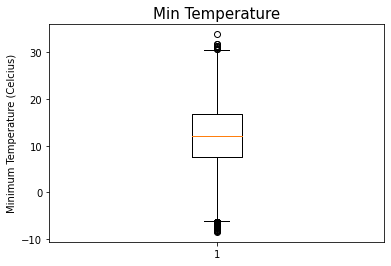

In [46]:
# create a boxplot to see if there are outliers
# boxplot of min temp
plt.title("Min Temperature", fontsize=15)
plt.boxplot(flat_df1['min_temp'])
plt.ylabel("Minimum Temperature (Celcius)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

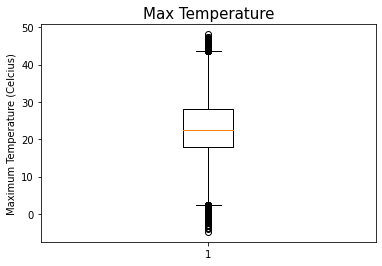

In [47]:
# boxplot of max temp
plt.title("Max Temperature", fontsize=15)
plt.boxplot(flat_df1['max_temp'])
plt.ylabel("Maximum Temperature (Celcius)")
plt.show

In [48]:
# remove min temp that is above 33 degrees and below -7 degrees according to boxplot
flat_df2 = flat_df1[(flat_df1['min_temp'] <= 33) & (flat_df1['min_temp'] >= -7)]


print("The size of the data is now {}.".format(flat_df2.shape[0]))

The size of the data is now 143565.


In [49]:
# remove max temp that is above 47 degrees and below 0 degrees according to boxplot
flat_df2 = flat_df1[(flat_df1['max_temp'] <= 47) & (flat_df1['max_temp'] >= 0)]


print("The size of the data is now {}.".format(flat_df2.shape[0]))

The size of the data is now 143465.


### 5. Grouping by Location and Retrieving Stats 

In [1]:
# gathers statistical data by location as to make the information more streamined and readable
flat_df2.groupby('location').describe()

NameError: name 'flat_df2' is not defined

In [52]:
# if looking at a spcific variable one can call that out separately as to not have such a big table as above
# this is the stats of min temp by location
flat_df2.groupby('location').describe()['min_temp']

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Adelaide,3189.0,12.581373,4.987441,0.7,9.1,12.10,15.5,33.9
Albany,2928.0,12.966086,3.537617,1.8,10.3,12.90,15.8,21.5
Albury,3021.0,9.532870,6.070377,-2.8,4.7,9.10,14.3,28.3
AliceSprings,3037.0,13.139282,7.747350,-5.2,6.8,13.70,19.7,30.3
BadgerysCreek,2967.0,11.133300,5.635735,-3.0,6.6,11.40,15.9,25.1
Ballarat,3038.0,7.369882,4.719280,-5.6,4.2,7.00,10.4,25.1
Bendigo,3034.0,8.593111,5.699497,-4.0,4.3,8.20,12.6,29.0
Brisbane,3172.0,16.419515,4.620539,2.6,12.8,16.80,20.3,28.0
Cairns,3039.0,21.220467,3.176509,9.2,19.4,21.90,23.7,28.4


In [229]:
# group by location and take mean of all the values
flat_df3 = flat_df2.groupby('location').mean()
flat_df3

,min_temp,max_temp,rainfall,wind_speed,temp_9am,temp_3pm
location,,,,,,
Adelaide,12.581373,22.900972,1.566462,36.499211,16.932549,21.563987
Albany,12.966086,20.053449,2.272951,NaN,16.260663,18.408243
Albury,9.532870,22.644952,1.919787,32.980013,14.361220,21.376268
AliceSprings,13.139282,29.246559,0.882073,40.526615,21.330985,28.005107
BadgerysCreek,11.133300,24.025986,2.193902,33.610350,16.572792,22.522226
Ballarat,7.369882,18.286175,1.738949,44.975399,11.671481,16.789215
Bendigo,8.593111,21.617798,1.621452,38.848283,13.843107,20.247247
Brisbane,16.419515,26.443033,3.150143,28.212150,21.826293,24.742740
Cairns,21.220467,29.559954,5.743957,38.031116,25.821429,27.909970


## Cleaning/Formatting Website Data

In [12]:
from bs4 import BeautifulSoup
import pandas as pd
import urllib3

# load URL
url = (r'https://en.wikipedia.org/wiki/Climate_of_Australia')

# get URL and assign to variable for BeautifulSoup
http = urllib3.PoolManager()
res = http.request('GET',url)
page = res.data
soup = BeautifulSoup(page)

# calculate the how many tables there are
tables = soup.find_all("table")
print("There are {} tables.".format(len(tables)))

There are 20 tables.


### 1. Formatting Data into Readable Format (pulling off webpage)

In [13]:
# I initially had this done for the first table and realized I could make it a function to save on typing for all tables
# created a function that pulls data from webpage and creates a dataframe
def web_scraping(data_table):

    # find all the data in the the data tables' body
    data = data_table.tbody.findAll('tr', recursive=False)

    # append the data into a list called "data_tables"
    data_tables = []
    for td in data:
        data_tables.append(td)
    
    # get header from first row
    header = [th.getText().strip() for th in data_tables[0].findAll('th')]

    # separate rows from header
    rows = data_tables[1:]

    # strip text from rows
    text_rows = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows]
    
    # add table to dataframe
    df = pd.DataFrame(text_rows, columns=header)
    df.head(15)
    
    return(df)

In [14]:
# find the right table using the class attribute
data_table1 = soup.findAll("table", {"class": "wikitable"})[0]

# call the function on the correct table from above
web_df1 = web_scraping(data_table1)
web_df1

,Place,Climate type,January mean max. temp,January mean min. temp,July mean max. temp,July mean min. temp,No. clear days,Annual precipitation
0,Albury[12],Cfa,31 °C (88 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),108,691 mm (27 in)
1,Armidale[13],Cfb,26 °C (79 °F),14 °C (57 °F),12 °C (54 °F),1 °C (34 °F),106[14],743 mm (29 in)
2,Broken Hill[15],BWh,33 °C (91 °F),19 °C (66 °F),15 °C (59 °F),5 °C (41 °F),137,245 mm (10 in)
3,Charlotte Pass[16],Cfc/Dfc,18 °C (64 °F),5 °C (41 °F),2 °C (36 °F),−7 °C (19 °F),78,"1,948 mm (77 in)"
4,Coffs Harbour[17],Cfa,27 °C (81 °F),19 °C (66 °F),19 °C (66 °F),8 °C (46 °F),122,"1,679 mm (66 in)"
5,Orange[18],Cfb,26 °C (79 °F),12 °C (54 °F),9 °C (48 °F),1 °C (34 °F),100,898 mm (35 in)
6,Penrith[19],Cfa,31 °C (88 °F),18 °C (64 °F),18 °C (64 °F),5 °C (41 °F),103,696 mm (27 in)
7,Sydney[20] (capital),Cfa,26 °C (79 °F),19 °C (66 °F),16 °C (61 °F),8 °C (46 °F),104,"1,222 mm (48 in)"
8,Wagga Wagga[21],Cfa,32 °C (90 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),124,566 mm (22 in)
9,Wollongong[22],Cfb,26 °C (79 °F),18 °C (64 °F),17 °C (63 °F),8 °C (46 °F),107,"1,346 mm (53 in)"


**Repeat this process with all of the other tables.**

In [15]:
# find the right table using the class attribute
data_table2 = soup.findAll("table", {"class": "wikitable"})[1]

# call the function on the correct table from above
web_df2 = web_scraping(data_table2)
web_df2

,Place,Climate type,January max. temp,January min. temp,July max. Temp,July min. temp,No. clear days,Annual precipitation
0,Birdsville[28],BWh,39 °C (102 °F),24 °C (75 °F),21 °C (70 °F),7 °C (45 °F),221,164 mm (6 in)
1,Brisbane[29] (capital),Cfa,30 °C (86 °F),21 °C (70 °F),22 °C (72 °F),10 °C (50 °F),123,"1,022 mm (40 in)"
2,Cairns[30],Am,32 °C (90 °F),24 °C (75 °F),26 °C (79 °F),17 °C (63 °F),90,"1,982 mm (78 in)"
3,Gold Coast[31],Cfa,29 °C (84 °F),22 °C (72 °F),21 °C (70 °F),12 °C (54 °F),N/A,"1,273 mm (50 in)"
4,Mackay[32],Cfa,30 °C (86 °F),24 °C (75 °F),21 °C (70 °F),13 °C (55 °F),123,"1,610 mm (63 in)"
5,Mount Isa[33],BSh,37 °C (99 °F),24 °C (75 °F),25 °C (77 °F),9 °C (48 °F),175,462 mm (18 in)
6,Rockhampton[34],Cfa,32 °C (90 °F),22 °C (72 °F),23 °C (73 °F),10 °C (50 °F),116,812 mm (32 in)
7,Stanthorpe[35],Cfb,27 °C (81 °F),16 °C (61 °F),15 °C (59 °F),1 °C (34 °F),42,762 mm (30 in)
8,Toowoomba[36],Cfa,28 °C (82 °F),17 °C (63 °F),16 °C (61 °F),5 °C (41 °F),114,952 mm (37 in)
9,Townsville[37],Aw,31 °C (88 °F),24 °C (75 °F),25 °C (77 °F),14 °C (57 °F),121,"1,132 mm (45 in)"


In [16]:
# find the right table using the class attribute
data_table3 = soup.findAll("table", {"class": "wikitable"})[2]

# call the function on the correct table from above
web_df3 = web_scraping(data_table3)
web_df3

,Place,Climate type,January max. temp,January min. temp,July max. temp,July min. temp,No. clear days,Annual precipitation
0,Adelaide[40] (capital),Csa,29 °C (84 °F),17 °C (63 °F),15 °C (59 °F),7 °C (45 °F),87,551 mm (22 in)
1,Kingscote[41],Csb,24 °C (75 °F),15 °C (59 °F),15 °C (59 °F),8 °C (46 °F),62,489 mm (19 in)
2,Mount Gambier[42],Csb,25 °C (77 °F),11 °C (52 °F),13 °C (55 °F),5 °C (41 °F),40,710 mm (28 in)
3,Oodnadatta[43],BWh,38 °C (100 °F),23 °C (73 °F),20 °C (68 °F),6 °C (43 °F),182,176 mm (7 in)
4,Port Augusta[44],BWh,34 °C (93 °F),19 °C (66 °F),18 °C (64 °F),5 °C (41 °F),142,218 mm (9 in)
5,Stirling[45],Csb/Cfb,25 °C (77 °F),12 °C (54 °F),11 °C (52 °F),5 °C (41 °F),71,"1,107 mm (44 in)"
6,Whyalla[46],BSh,30 °C (86 °F),18 °C (64 °F),17 °C (63 °F),5 °C (41 °F),63,267 mm (11 in)


In [17]:
# find the right table using the class attribute
data_table4 = soup.findAll("table", {"class": "wikitable"})[3]

# call the function on the correct table from above
web_df4 = web_scraping(data_table4)
web_df4

,Place,Climate type,January max. temp,January min. temp,July max. temp,July min. temp,No. clear days,Annual precipitation
0,Burnie[49],Cfb,21 °C (70 °F),13 °C (55 °F),13 °C (55 °F),6 °C (43 °F),52,958 mm (38 in)
1,Devonport[50],Csb,21 °C (70 °F),12 °C (54 °F),13 °C (55 °F),5 °C (41 °F),56,773 mm (30 in)
2,Flinders Island[51],Cfb,22 °C (72 °F),14 °C (57 °F),13 °C (55 °F),6 °C (43 °F),47,741 mm (29 in)
3,Hobart[52] (capital),Cfb,22 °C (72 °F),12 °C (54 °F),12 °C (54 °F),5 °C (41 °F),41,615 mm (24 in)
4,King Island[53],Csb,21 °C (70 °F),13 °C (55 °F),13 °C (55 °F),8 °C (46 °F),20,854 mm (34 in)
5,Launceston[54],Cfb,25 °C (77 °F),11 °C (52 °F),12 °C (54 °F),2 °C (36 °F),50,630 mm (25 in)
6,Liawenee[55],Csc,19 °C (66 °F),6 °C (43 °F),6 °C (43 °F),−2 °C (28 °F),22,923 mm (36 in)
7,Queenstown[56],Cfb,21 °C (70 °F),8 °C (46 °F),12 °C (54 °F),2 °C (36 °F),29,"2,405 mm (95 in)"
8,St Helens[57],Cfb,23 °C (73 °F),13 °C (55 °F),14 °C (57 °F),5 °C (41 °F),N/A,666 mm (26 in)
9,Strahan[58],Cfb,21 °C (70 °F),11 °C (52 °F),12 °C (54 °F),5 °C (41 °F),16,"1,544 mm (61 in)"


**Note:** There are 20 tables from the webpage but I decided to only use the first four to show processes.

### 2. Rename headers so all data frames are consistant

In [18]:
# rename columns for 1st df
columns = {'Place':'Place', 'Climate type':'Climate type', 'January mean max. temp':'January max. temp', 'January mean min. temp':'January min. temp',
           'July mean max. temp':'July max. temp', 'July mean min. temp':'July min. temp', 'No. clear days':'No. clear days', 'Annual precipitation':'Annual precipitation'}
web_df1.rename(columns=columns, inplace=True)
web_df1

,Place,Climate type,January max. temp,January min. temp,July max. temp,July min. temp,No. clear days,Annual precipitation
0,Albury[12],Cfa,31 °C (88 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),108,691 mm (27 in)
1,Armidale[13],Cfb,26 °C (79 °F),14 °C (57 °F),12 °C (54 °F),1 °C (34 °F),106[14],743 mm (29 in)
2,Broken Hill[15],BWh,33 °C (91 °F),19 °C (66 °F),15 °C (59 °F),5 °C (41 °F),137,245 mm (10 in)
3,Charlotte Pass[16],Cfc/Dfc,18 °C (64 °F),5 °C (41 °F),2 °C (36 °F),−7 °C (19 °F),78,"1,948 mm (77 in)"
4,Coffs Harbour[17],Cfa,27 °C (81 °F),19 °C (66 °F),19 °C (66 °F),8 °C (46 °F),122,"1,679 mm (66 in)"
5,Orange[18],Cfb,26 °C (79 °F),12 °C (54 °F),9 °C (48 °F),1 °C (34 °F),100,898 mm (35 in)
6,Penrith[19],Cfa,31 °C (88 °F),18 °C (64 °F),18 °C (64 °F),5 °C (41 °F),103,696 mm (27 in)
7,Sydney[20] (capital),Cfa,26 °C (79 °F),19 °C (66 °F),16 °C (61 °F),8 °C (46 °F),104,"1,222 mm (48 in)"
8,Wagga Wagga[21],Cfa,32 °C (90 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),124,566 mm (22 in)
9,Wollongong[22],Cfb,26 °C (79 °F),18 °C (64 °F),17 °C (63 °F),8 °C (46 °F),107,"1,346 mm (53 in)"


In [19]:
# rename columns for 2nd df
columns2 = {'Place':'Place', 'Climate type':'Climate type', 'January max. temp':'January max. temp', 'January min. temp':'January min. temp',
            'July max. Temp':'July max. temp', 'July min. temp':'July min. temp', 'No. clear days':'No. clear days', 'Annual precipitation':'Annual precipitation'}
web_df2.rename(columns=columns2, inplace=True)
web_df2

,Place,Climate type,January max. temp,January min. temp,July max. temp,July min. temp,No. clear days,Annual precipitation
0,Birdsville[28],BWh,39 °C (102 °F),24 °C (75 °F),21 °C (70 °F),7 °C (45 °F),221,164 mm (6 in)
1,Brisbane[29] (capital),Cfa,30 °C (86 °F),21 °C (70 °F),22 °C (72 °F),10 °C (50 °F),123,"1,022 mm (40 in)"
2,Cairns[30],Am,32 °C (90 °F),24 °C (75 °F),26 °C (79 °F),17 °C (63 °F),90,"1,982 mm (78 in)"
3,Gold Coast[31],Cfa,29 °C (84 °F),22 °C (72 °F),21 °C (70 °F),12 °C (54 °F),N/A,"1,273 mm (50 in)"
4,Mackay[32],Cfa,30 °C (86 °F),24 °C (75 °F),21 °C (70 °F),13 °C (55 °F),123,"1,610 mm (63 in)"
5,Mount Isa[33],BSh,37 °C (99 °F),24 °C (75 °F),25 °C (77 °F),9 °C (48 °F),175,462 mm (18 in)
6,Rockhampton[34],Cfa,32 °C (90 °F),22 °C (72 °F),23 °C (73 °F),10 °C (50 °F),116,812 mm (32 in)
7,Stanthorpe[35],Cfb,27 °C (81 °F),16 °C (61 °F),15 °C (59 °F),1 °C (34 °F),42,762 mm (30 in)
8,Toowoomba[36],Cfa,28 °C (82 °F),17 °C (63 °F),16 °C (61 °F),5 °C (41 °F),114,952 mm (37 in)
9,Townsville[37],Aw,31 °C (88 °F),24 °C (75 °F),25 °C (77 °F),14 °C (57 °F),121,"1,132 mm (45 in)"


### 3. Concatinate Tables Together into One Dataframe

In [20]:
web_df = pd.concat([web_df1, web_df2, web_df3, web_df4], axis=0)
web_df

,Place,Climate type,January max. temp,January min. temp,July max. temp,July min. temp,No. clear days,Annual precipitation
0,Albury[12],Cfa,31 °C (88 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),108,691 mm (27 in)
1,Armidale[13],Cfb,26 °C (79 °F),14 °C (57 °F),12 °C (54 °F),1 °C (34 °F),106[14],743 mm (29 in)
2,Broken Hill[15],BWh,33 °C (91 °F),19 °C (66 °F),15 °C (59 °F),5 °C (41 °F),137,245 mm (10 in)
3,Charlotte Pass[16],Cfc/Dfc,18 °C (64 °F),5 °C (41 °F),2 °C (36 °F),−7 °C (19 °F),78,"1,948 mm (77 in)"
4,Coffs Harbour[17],Cfa,27 °C (81 °F),19 °C (66 °F),19 °C (66 °F),8 °C (46 °F),122,"1,679 mm (66 in)"
5,Orange[18],Cfb,26 °C (79 °F),12 °C (54 °F),9 °C (48 °F),1 °C (34 °F),100,898 mm (35 in)
6,Penrith[19],Cfa,31 °C (88 °F),18 °C (64 °F),18 °C (64 °F),5 °C (41 °F),103,696 mm (27 in)
7,Sydney[20] (capital),Cfa,26 °C (79 °F),19 °C (66 °F),16 °C (61 °F),8 °C (46 °F),104,"1,222 mm (48 in)"
8,Wagga Wagga[21],Cfa,32 °C (90 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),124,566 mm (22 in)
9,Wollongong[22],Cfb,26 °C (79 °F),18 °C (64 °F),17 °C (63 °F),8 °C (46 °F),107,"1,346 mm (53 in)"


### 4. Fix Indexing

In [21]:
# checks number of rows in df
len(web_df)

38

In [22]:
# new index is created and reapplied to df
new_index = pd.Series(range(38))
web_df.set_index(new_index, inplace=True)
web_df

,Place,Climate type,January max. temp,January min. temp,July max. temp,July min. temp,No. clear days,Annual precipitation
0,Albury[12],Cfa,31 °C (88 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),108,691 mm (27 in)
1,Armidale[13],Cfb,26 °C (79 °F),14 °C (57 °F),12 °C (54 °F),1 °C (34 °F),106[14],743 mm (29 in)
2,Broken Hill[15],BWh,33 °C (91 °F),19 °C (66 °F),15 °C (59 °F),5 °C (41 °F),137,245 mm (10 in)
3,Charlotte Pass[16],Cfc/Dfc,18 °C (64 °F),5 °C (41 °F),2 °C (36 °F),−7 °C (19 °F),78,"1,948 mm (77 in)"
4,Coffs Harbour[17],Cfa,27 °C (81 °F),19 °C (66 °F),19 °C (66 °F),8 °C (46 °F),122,"1,679 mm (66 in)"
5,Orange[18],Cfb,26 °C (79 °F),12 °C (54 °F),9 °C (48 °F),1 °C (34 °F),100,898 mm (35 in)
6,Penrith[19],Cfa,31 °C (88 °F),18 °C (64 °F),18 °C (64 °F),5 °C (41 °F),103,696 mm (27 in)
7,Sydney[20] (capital),Cfa,26 °C (79 °F),19 °C (66 °F),16 °C (61 °F),8 °C (46 °F),104,"1,222 mm (48 in)"
8,Wagga Wagga[21],Cfa,32 °C (90 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),124,566 mm (22 in)
9,Wollongong[22],Cfb,26 °C (79 °F),18 °C (64 °F),17 °C (63 °F),8 °C (46 °F),107,"1,346 mm (53 in)"


### 5. Fix Inconsistant Values to Remove Citation [#]

In [23]:
# removes most of the [#] from rows
string = list(web_df.Place)
new_list = [s[:-4] for s in string]

# remove remaining characters from specific rows
new_list[7] = 'Sydney'
new_list[11] = 'Brisbane'
new_list[21] = 'Adelaide'
new_list[31] = 'Hobart'
print(new_list)

# reassign back to df
web_df.Place = new_list
web_df

['Albury', 'Armidale', 'Broken Hill', 'Charlotte Pass', 'Coffs Harbour', 'Orange', 'Penrith', 'Sydney', 'Wagga Wagga', 'Wollongong', 'Birdsville', 'Brisbane', 'Cairns', 'Gold Coast', 'Mackay', 'Mount Isa', 'Rockhampton', 'Stanthorpe', 'Toowoomba', 'Townsville', 'Weipa', 'Adelaide', 'Kingscote', 'Mount Gambier', 'Oodnadatta', 'Port Augusta', 'Stirling', 'Whyalla', 'Burnie', 'Devonport', 'Flinders Island', 'Hobart', 'King Island', 'Launceston', 'Liawenee', 'Queenstown', 'St Helens', 'Strahan']


,Place,Climate type,January max. temp,January min. temp,July max. temp,July min. temp,No. clear days,Annual precipitation
0,Albury,Cfa,31 °C (88 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),108,691 mm (27 in)
1,Armidale,Cfb,26 °C (79 °F),14 °C (57 °F),12 °C (54 °F),1 °C (34 °F),106[14],743 mm (29 in)
2,Broken Hill,BWh,33 °C (91 °F),19 °C (66 °F),15 °C (59 °F),5 °C (41 °F),137,245 mm (10 in)
3,Charlotte Pass,Cfc/Dfc,18 °C (64 °F),5 °C (41 °F),2 °C (36 °F),−7 °C (19 °F),78,"1,948 mm (77 in)"
4,Coffs Harbour,Cfa,27 °C (81 °F),19 °C (66 °F),19 °C (66 °F),8 °C (46 °F),122,"1,679 mm (66 in)"
5,Orange,Cfb,26 °C (79 °F),12 °C (54 °F),9 °C (48 °F),1 °C (34 °F),100,898 mm (35 in)
6,Penrith,Cfa,31 °C (88 °F),18 °C (64 °F),18 °C (64 °F),5 °C (41 °F),103,696 mm (27 in)
7,Sydney,Cfa,26 °C (79 °F),19 °C (66 °F),16 °C (61 °F),8 °C (46 °F),104,"1,222 mm (48 in)"
8,Wagga Wagga,Cfa,32 °C (90 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),124,566 mm (22 in)
9,Wollongong,Cfb,26 °C (79 °F),18 °C (64 °F),17 °C (63 °F),8 °C (46 °F),107,"1,346 mm (53 in)"


In [24]:
# remove citation from second row of No. clear days column
web_df.at[1,'No. clear days'] = 106
web_df

,Place,Climate type,January max. temp,January min. temp,July max. temp,July min. temp,No. clear days,Annual precipitation
0,Albury,Cfa,31 °C (88 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),108,691 mm (27 in)
1,Armidale,Cfb,26 °C (79 °F),14 °C (57 °F),12 °C (54 °F),1 °C (34 °F),106,743 mm (29 in)
2,Broken Hill,BWh,33 °C (91 °F),19 °C (66 °F),15 °C (59 °F),5 °C (41 °F),137,245 mm (10 in)
3,Charlotte Pass,Cfc/Dfc,18 °C (64 °F),5 °C (41 °F),2 °C (36 °F),−7 °C (19 °F),78,"1,948 mm (77 in)"
4,Coffs Harbour,Cfa,27 °C (81 °F),19 °C (66 °F),19 °C (66 °F),8 °C (46 °F),122,"1,679 mm (66 in)"
5,Orange,Cfb,26 °C (79 °F),12 °C (54 °F),9 °C (48 °F),1 °C (34 °F),100,898 mm (35 in)
6,Penrith,Cfa,31 °C (88 °F),18 °C (64 °F),18 °C (64 °F),5 °C (41 °F),103,696 mm (27 in)
7,Sydney,Cfa,26 °C (79 °F),19 °C (66 °F),16 °C (61 °F),8 °C (46 °F),104,"1,222 mm (48 in)"
8,Wagga Wagga,Cfa,32 °C (90 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),124,566 mm (22 in)
9,Wollongong,Cfb,26 °C (79 °F),18 °C (64 °F),17 °C (63 °F),8 °C (46 °F),107,"1,346 mm (53 in)"


### 6. Replace Headers

In [144]:
columns = {'Place':'city', 'Climate type':'climate', 'January max. temp':'jan_max_temp', 'January min. temp':'jan_min_temp', 
           'July max. temp':'july_max_temp','July min. temp':'july_min_tmp', 
           'No. clear days':'clear_days', 'Annual precipitation':'precipitation'}
web_df.rename(columns=columns, inplace=True)
web_df.head()

,city,climate,jan_max_temp,jan_min_temp,july_max_temp,july_min_tmp,clear_days,precipitation
0,Albury,Cfa,31 °C (88 °F),16 °C (61 °F),13 °C (55 °F),3 °C (37 °F),108,691 mm (27 in)
1,Armidale,Cfb,26 °C (79 °F),14 °C (57 °F),12 °C (54 °F),1 °C (34 °F),106,743 mm (29 in)
2,Broken Hill,BWh,33 °C (91 °F),19 °C (66 °F),15 °C (59 °F),5 °C (41 °F),137,245 mm (10 in)
3,Charlotte Pass,Cfc/Dfc,18 °C (64 °F),5 °C (41 °F),2 °C (36 °F),−7 °C (19 °F),78,"1,948 mm (77 in)"
4,Coffs Harbour,Cfa,27 °C (81 °F),19 °C (66 °F),19 °C (66 °F),8 °C (46 °F),122,"1,679 mm (66 in)"


## Connecting to an API/Pulling in the Data and Cleaning/Formatting

### 1. Retrieving Data from API

In [25]:
import requests
from urllib.error import HTTPError,URLError
import json
import pandas as pd

# load the API key from a JSON file
with open('APIkeys.json') as f:
    keys = json.load(f)
    weatherapi = keys['weatherapi']

# define api key, list of city names to call, and set an empty list to place json data in
api_key = weatherapi
city_name = ['Sydney', 'Canberra', 'Melbourne', 'Perth', 'Brisbane', 'Adelaide', 'Cairns', 'Darwin', 'Wollongong', 'Toowoomba']
weather_data = []

# try except statement to catch errors
try:
    # for loop which iterates through all the cities and performs and api call on each one
    for city in city_name:
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'
        response = requests.get(url)  # get request using the requests library
        data = json.loads(response.text)  # processes the data into json data in order to print the results properly
        weather_data.append(data)    # adds data to weather_data list
except URLError as e:
    print('Failed to reach server.')
    print('Reason ', e.reason)

In [26]:
# print data to verify it worked
print(weather_data)

[{'coord': {'lon': 151.2073, 'lat': -33.8679}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.64, 'feels_like': 9.72, 'temp_min': 5.82, 'temp_max': 12.62, 'pressure': 1024, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 353, 'gust': 0.89}, 'clouds': {'all': 75}, 'dt': 1622393181, 'sys': {'type': 2, 'id': 2018875, 'country': 'AU', 'sunrise': 1622407865, 'sunset': 1622444093}, 'timezone': 36000, 'id': 2147714, 'name': 'Sydney', 'cod': 200}, {'coord': {'lon': 149.1281, 'lat': -35.2835}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -1.26, 'feels_like': -1.26, 'temp_min': -4.26, 'temp_max': 2.08, 'pressure': 1026, 'humidity': 90}, 'visibility': 2100, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1622393100, 'sys': {'type': 1, 'id': 9588, 'country': 'AU', 'sunrise': 1622408568, 'sunset': 162244438

### 2. Converting Data into Usable Data Frame

In [53]:
# put json data into a data frame
api_df = pd.DataFrame(weather_data)
api_df.head()

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,rain
0,"{'lon': 151.2073, 'lat': -33.8679}","[{'id': 803, 'main': 'Clouds', 'description': ...",stations,"{'temp': 10.64, 'feels_like': 9.72, 'temp_min'...",10000,"{'speed': 0.45, 'deg': 353, 'gust': 0.89}",{'all': 75},1622393181,"{'type': 2, 'id': 2018875, 'country': 'AU', 's...",36000,2147714,Sydney,200,NaN
1,"{'lon': 149.1281, 'lat': -35.2835}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': -1.26, 'feels_like': -1.26, 'temp_min...",2100,"{'speed': 0, 'deg': 0}",{'all': 0},1622393100,"{'type': 1, 'id': 9588, 'country': 'AU', 'sunr...",36000,2172517,Canberra,200,NaN
2,"{'lon': -80.6081, 'lat': 28.0836}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 30.02, 'feels_like': 34.61, 'temp_min...",10000,"{'speed': 2.57, 'deg': 0}",{'all': 40},1622393132,"{'type': 1, 'id': 4922, 'country': 'US', 'sunr...",-14400,4163971,Melbourne,200,NaN
3,"{'lon': 115.8333, 'lat': -31.9333}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 11.88, 'feels_like': 11.58, 'temp_min...",10000,"{'speed': 5.89, 'deg': 183, 'gust': 10.06}",{'all': 0},1622393049,"{'type': 2, 'id': 63154, 'country': 'AU', 'sun...",28800,2063523,Perth,200,NaN
4,"{'lon': 153.0281, 'lat': -27.4679}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 12.61, 'feels_like': 11.94, 'temp_min...",10000,"{'speed': 1.34, 'deg': 203, 'gust': 4.47}",{'all': 40},1622393175,"{'type': 2, 'id': 2005393, 'country': 'AU', 's...",36000,2174003,Brisbane,200,NaN


In [28]:
# pull out the wind column into it's own data frame since the entries were dictionaries
wind_df = df['wind'].apply(pd.Series)
wind_df

,speed,deg,gust
0,0.45,353.0,0.89
1,0.00,0.0,NaN
2,2.57,0.0,NaN
3,5.89,183.0,10.06
4,1.34,203.0,4.47
5,3.09,360.0,NaN
6,4.12,170.0,NaN
7,1.03,140.0,NaN
8,3.03,241.0,3.46
9,1.24,183.0,1.40


In [29]:
# pull out the main column into it's own data frame since the entries were dictionaries
main_df = df['main'].apply(pd.Series)
main_df

,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level
0,10.64,9.72,5.82,12.62,1024.0,75.0,NaN,NaN
1,-1.26,-1.26,-4.26,2.08,1026.0,90.0,NaN,NaN
2,30.02,34.61,27.20,32.25,1017.0,68.0,NaN,NaN
3,11.88,11.58,10.00,14.92,1016.0,94.0,NaN,NaN
4,12.61,11.94,8.99,15.88,1023.0,77.0,NaN,NaN
5,9.64,8.03,6.71,11.90,1019.0,52.0,NaN,NaN
6,19.74,20.28,19.50,21.15,1014.0,96.0,NaN,NaN
7,22.81,23.47,22.19,22.99,1011.0,89.0,NaN,NaN
8,8.68,6.91,6.49,11.71,1025.0,80.0,1025.0,1022.0
9,5.82,5.82,1.41,7.36,1023.0,83.0,NaN,NaN


### 3. Merging Data Frames

In [54]:
# combine the two dfs
api_df1 = pd.concat([wind_df, main_df], axis=1)
api_df1

,speed,deg,gust,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level
0,0.45,353.0,0.89,10.64,9.72,5.82,12.62,1024.0,75.0,NaN,NaN
1,0.00,0.0,NaN,-1.26,-1.26,-4.26,2.08,1026.0,90.0,NaN,NaN
2,2.57,0.0,NaN,30.02,34.61,27.20,32.25,1017.0,68.0,NaN,NaN
3,5.89,183.0,10.06,11.88,11.58,10.00,14.92,1016.0,94.0,NaN,NaN
4,1.34,203.0,4.47,12.61,11.94,8.99,15.88,1023.0,77.0,NaN,NaN
5,3.09,360.0,NaN,9.64,8.03,6.71,11.90,1019.0,52.0,NaN,NaN
6,4.12,170.0,NaN,19.74,20.28,19.50,21.15,1014.0,96.0,NaN,NaN
7,1.03,140.0,NaN,22.81,23.47,22.19,22.99,1011.0,89.0,NaN,NaN
8,3.03,241.0,3.46,8.68,6.91,6.49,11.71,1025.0,80.0,1025.0,1022.0
9,1.24,183.0,1.40,5.82,5.82,1.41,7.36,1023.0,83.0,NaN,NaN


### 4. Changing Index

In [56]:
# change index to city name
api_df2 = new_df.set_index(api_df.name)
api_df2

,speed,deg,gust,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level
name,,,,,,,,,,,
Sydney,0.45,353.0,0.89,10.64,9.72,5.82,12.62,1024.0,75.0,NaN,NaN
Canberra,0.00,0.0,NaN,-1.26,-1.26,-4.26,2.08,1026.0,90.0,NaN,NaN
Melbourne,2.57,0.0,NaN,30.02,34.61,27.20,32.25,1017.0,68.0,NaN,NaN
Perth,5.89,183.0,10.06,11.88,11.58,10.00,14.92,1016.0,94.0,NaN,NaN
Brisbane,1.34,203.0,4.47,12.61,11.94,8.99,15.88,1023.0,77.0,NaN,NaN
Adelaide,3.09,360.0,NaN,9.64,8.03,6.71,11.90,1019.0,52.0,NaN,NaN
Cairns,4.12,170.0,NaN,19.74,20.28,19.50,21.15,1014.0,96.0,NaN,NaN
Darwin,1.03,140.0,NaN,22.81,23.47,22.19,22.99,1011.0,89.0,NaN,NaN
Wollongong,3.03,241.0,3.46,8.68,6.91,6.49,11.71,1025.0,80.0,1025.0,1022.0


### 5. Retrieving Stats to See Trends

In [57]:
# stats on data frame
api_df2.describe()

,speed,deg,gust,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level
count,10.000000,10.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,1.0,1.0
mean,2.276000,183.300000,4.056000,13.058000,13.110000,10.405000,15.286000,1019.800000,80.40000,1025.0,1022.0
std,1.819501,121.558445,3.662394,8.963745,10.328374,9.728642,8.502173,5.138093,13.34333,NaN,NaN
min,0.000000,0.000000,0.890000,-1.260000,-1.260000,-4.260000,2.080000,1011.000000,52.00000,1025.0,1022.0
25%,1.082500,147.500000,1.400000,8.920000,7.190000,5.987500,11.757500,1016.250000,75.50000,1025.0,1022.0
50%,1.955000,183.000000,3.460000,11.260000,10.650000,7.850000,13.770000,1021.000000,81.50000,1025.0,1022.0
75%,3.075000,231.500000,4.470000,17.957500,18.195000,17.125000,19.832500,1023.750000,89.75000,1025.0,1022.0
max,5.890000,360.000000,10.060000,30.020000,34.610000,27.200000,32.250000,1026.000000,96.00000,1025.0,1022.0


### 6. Removing Columns with NaN Values

In [58]:
# remove sea level and ground level columns since they are mostly NaN values
api_df2.drop(['sea_level', 'grnd_level'], axis = 1)

,speed,deg,gust,temp,feels_like,temp_min,temp_max,pressure,humidity
name,,,,,,,,,
Sydney,0.45,353.0,0.89,10.64,9.72,5.82,12.62,1024.0,75.0
Canberra,0.00,0.0,NaN,-1.26,-1.26,-4.26,2.08,1026.0,90.0
Melbourne,2.57,0.0,NaN,30.02,34.61,27.20,32.25,1017.0,68.0
Perth,5.89,183.0,10.06,11.88,11.58,10.00,14.92,1016.0,94.0
Brisbane,1.34,203.0,4.47,12.61,11.94,8.99,15.88,1023.0,77.0
Adelaide,3.09,360.0,NaN,9.64,8.03,6.71,11.90,1019.0,52.0
Cairns,4.12,170.0,NaN,19.74,20.28,19.50,21.15,1014.0,96.0
Darwin,1.03,140.0,NaN,22.81,23.47,22.19,22.99,1011.0,89.0
Wollongong,3.03,241.0,3.46,8.68,6.91,6.49,11.71,1025.0,80.0


## Milestone 5 - Merging the Data and Storing in a Database/Visualizing Data
### Importing Each Data Set into SQLlite

In [237]:
import sqlite3
from sqlalchemy import create_engine

# create a file location for database to go
# echo=true shows the info below to confirm connection was successful
engine = create_engine('sqlite:///540project_data.db', echo=True)
sqlite_connection = engine.connect()

2021-05-30 20:18:58,348 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-05-30 20:18:58,348 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:18:58,350 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-05-30 20:18:58,350 INFO sqlalchemy.engine.base.Engine ()


In [238]:
# create a table for the flat data to go
# if_exists='fail' prevents the table from being created more than once if rerun
sql_table = "flat"
flat_df3.to_sql(sql_table, sqlite_connection, if_exists='fail', chunksize=1000)

2021-05-30 20:18:59,680 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("flat")
2021-05-30 20:18:59,681 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:18:59,683 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("flat")
2021-05-30 20:18:59,683 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:18:59,686 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE flat (
	location TEXT, 
	min_temp FLOAT, 
	max_temp FLOAT, 
	rainfall FLOAT, 
	wind_speed FLOAT, 
	temp_9am FLOAT, 
	temp_3pm FLOAT
)


2021-05-30 20:18:59,686 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:18:59,714 INFO sqlalchemy.engine.base.Engine COMMIT
2021-05-30 20:18:59,715 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_flat_location ON flat (location)
2021-05-30 20:18:59,717 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:18:59,736 INFO sqlalchemy.engine.base.Engine COMMIT
2021-05-30 20:18:59,738 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-05-30 20:18:59,740 INFO sqlalchemy.engine.

In [239]:
# repeat for other two data frames
# create table for web data
sql_table2 = "web"
web_df.to_sql(sql_table2, sqlite_connection, if_exists='fail')

2021-05-30 20:19:00,680 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("web")
2021-05-30 20:19:00,681 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:19:00,682 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("web")
2021-05-30 20:19:00,683 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:19:00,686 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE web (
	"index" BIGINT, 
	city TEXT, 
	climate TEXT, 
	jan_max_temp TEXT, 
	jan_min_temp TEXT, 
	july_max_temp TEXT, 
	july_min_tmp TEXT, 
	clear_days TEXT, 
	precipitation TEXT
)


2021-05-30 20:19:00,687 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:19:00,705 INFO sqlalchemy.engine.base.Engine COMMIT
2021-05-30 20:19:00,706 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_web_index ON web ("index")
2021-05-30 20:19:00,707 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:19:00,725 INFO sqlalchemy.engine.base.Engine COMMIT
2021-05-30 20:19:00,729 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-05-30

In [240]:
# create table for API data
sql_table2 = "api"
api_df2.to_sql(sql_table2, sqlite_connection, if_exists='fail')

2021-05-30 20:19:01,422 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("api")
2021-05-30 20:19:01,423 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:19:01,425 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("api")
2021-05-30 20:19:01,425 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:19:01,428 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE api (
	name TEXT, 
	speed FLOAT, 
	deg FLOAT, 
	gust FLOAT, 
	"temp" FLOAT, 
	feels_like FLOAT, 
	temp_min FLOAT, 
	temp_max FLOAT, 
	pressure FLOAT, 
	humidity FLOAT, 
	sea_level FLOAT, 
	grnd_level FLOAT
)


2021-05-30 20:19:01,429 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:19:01,446 INFO sqlalchemy.engine.base.Engine COMMIT
2021-05-30 20:19:01,448 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_api_name ON api (name)
2021-05-30 20:19:01,449 INFO sqlalchemy.engine.base.Engine ()
2021-05-30 20:19:01,466 INFO sqlalchemy.engine.base.Engine COMMIT
2021-05-30 20:19:01,469 INFO sqlalchemy.engine.base.Engine BE

In [241]:
# close connection
sqlite_connection.close()

### Join Datasets from SQL Into One Dataset

In [23]:
import sqlite3
import pandas as pd

# make new column names for new dataframe
columns = ['city', 'climate', 'jan_min_temp', 'jan_max_temp', 'wind_speed','min_temp', 
           'max_temp', 'pressure','humidty', 'rainfall', 'temp_9am', 'temp_3pm']
data = []

In [24]:
# connect to newly created database
with sqlite3.connect('540project_data.db') as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")
    # select specific columns from flat, web, and api tables and join on city
    sql = """SELECT web.city, web.climate, web.jan_max_temp, web.jan_min_temp,
    api.speed, api.temp_min, api.temp_max, api.pressure, api.humidity, flat.rainfall,
    flat.temp_9am, flat.temp_3pm FROM api
    JOIN web ON api.name = web.city
    JOIN flat ON api.name = flat.location"""
    
    rows = cursor.execute(sql)
    
    # appends data into list
    for row in rows:
        data.append(row)

# turns list data into data frame with new columns
new_df = pd.DataFrame(data, columns=columns)
new_df.head()

,city,climate,jan_min_temp,jan_max_temp,wind_speed,min_temp,max_temp,pressure,humidty,rainfall,temp_9am,temp_3pm
0,Sydney,Cfa,26 °C (79 °F),19 °C (66 °F),0.45,5.82,12.62,1024.0,75.0,3.322232,17.819844,21.530855
1,Brisbane,Cfa,30 °C (86 °F),21 °C (70 °F),1.34,8.99,15.88,1023.0,77.0,3.150143,21.826293,24.742740
2,Adelaide,Csa,29 °C (84 °F),17 °C (63 °F),3.09,6.71,11.90,1019.0,52.0,1.566462,16.932549,21.563987
3,Cairns,Am,32 °C (90 °F),24 °C (75 °F),4.12,19.50,21.15,1014.0,96.0,5.743957,25.821429,27.909970
4,Wollongong,Cfb,26 °C (79 °F),18 °C (64 °F),3.03,6.49,11.71,1025.0,80.0,3.599193,18.186156,19.927524


In [25]:
# make jan min and max temp an int and remove other text
ints = list(new_df.jan_min_temp)
new_ints = [i[:-11] for i in ints]

ints2 = list(new_df.jan_max_temp)
new_ints2 = [i[:-11] for i in ints2]

# reassign back to new_df
new_df.jan_min_temp = new_ints
new_df.jan_max_temp = new_ints2

new_df

,city,climate,jan_min_temp,jan_max_temp,wind_speed,min_temp,max_temp,pressure,humidty,rainfall,temp_9am,temp_3pm
0,Sydney,Cfa,26,19,0.45,5.82,12.62,1024.0,75.0,3.322232,17.819844,21.530855
1,Brisbane,Cfa,30,21,1.34,8.99,15.88,1023.0,77.0,3.150143,21.826293,24.742740
2,Adelaide,Csa,29,17,3.09,6.71,11.90,1019.0,52.0,1.566462,16.932549,21.563987
3,Cairns,Am,32,24,4.12,19.50,21.15,1014.0,96.0,5.743957,25.821429,27.909970
4,Wollongong,Cfb,26,18,3.03,6.49,11.71,1025.0,80.0,3.599193,18.186156,19.927524


### Data Visualizations
#### 1. Scatterplot Using Web and API Data

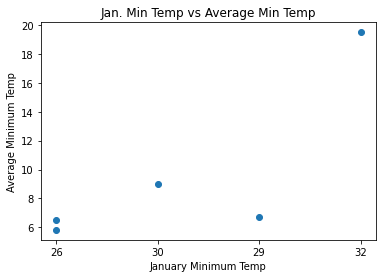

In [64]:
import matplotlib.pyplot as plt

# scatterplot of jan min temp from web data and overall min temp from api data
plt.scatter(new_df.jan_min_temp, new_df.min_temp)
plt.title("Jan. Min Temp vs Average Min Temp")
plt.xlabel('January Minimum Temp')
plt.ylabel('Average Minimum Temp')
plt.show()

# one should remeber that January is actually summer for Australia, so these values are very different
# from one another, which is indicative of the climate in January

#### 2. Scatterplot Using Web and API Data

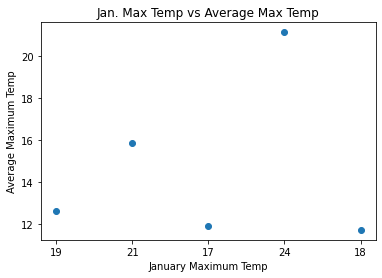

In [63]:
# scatterplot of jan max temp from web data and overall max temp from api data
plt.scatter(new_df.jan_max_temp, new_df.max_temp)
plt.title("Jan. Max Temp vs Average Max Temp")
plt.xlabel('January Maximum Temp')
plt.ylabel('Average Maximum Temp')
plt.show()

# these values have a closer range due to January being in summer, one of the hotter months of the year

In [34]:
# pull out flat data from SQL data base into dataframe

# make new column names for new dataframe
columns = ['location', 'min_temp', 'max_temp', 'rainfall', 'wind_speed', 
           'temp_9am', 'temp_3pm']
data = []

# connect to database
with sqlite3.connect('540project_data.db') as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")
    rows = cursor.execute("SELECT * from flat")
    
    # appends data into list
    for row in rows:
        data.append(row)

# turns list data into data frame with new columns
flat_df = pd.DataFrame(data, columns=columns)
flat_df.head()

,location,min_temp,max_temp,rainfall,wind_speed,temp_9am,temp_3pm
0,Adelaide,12.581373,22.900972,1.566462,36.499211,16.932549,21.563987
1,Albany,12.966086,20.053449,2.272951,NaN,16.260663,18.408243
2,Albury,9.532870,22.644952,1.919787,32.980013,14.361220,21.376268
3,AliceSprings,13.139282,29.246559,0.882073,40.526615,21.330985,28.005107
4,BadgerysCreek,11.133300,24.025986,2.193902,33.610350,16.572792,22.522226


#### 3. Bar Plot of Flat Data

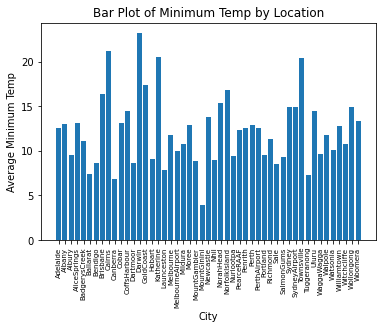

In [52]:
# bar plots of min temp
plt.bar(flat_df.location, flat_df.min_temp)
plt.title("Bar Plot of Minimum Temp by Location")
# makes locations easier to read
plt.xticks(rotation = 90, fontsize=7)
plt.xlabel('City')
plt.ylabel('Average Minimum Temp')
plt.show()

#### 4. Bar Plot of Flat Data

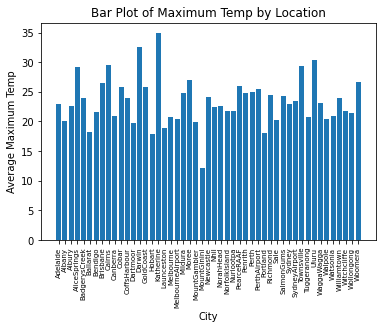

In [65]:
# bar plots of max temp
plt.bar(flat_df.location, flat_df.max_temp)
plt.title("Bar Plot of Maximum Temp by Location")
# makes locations easier to read
plt.xticks(rotation = 90, fontsize=7)
plt.xlabel('City')
plt.ylabel('Average Maximum Temp')
plt.show()

In [55]:
# pull out API data from SQL data base into dataframe

# make new column names for new dataframe
columns = ['name', 'speed', 'deg', 'gust', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
           'sea_level', 'grnd_level']
data = []

# connect to database
with sqlite3.connect('540project_data.db') as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = 1")
    rows = cursor.execute("SELECT * from api")
    
    # appends data into list
    for row in rows:
        data.append(row)

# turns list data into data frame with new columns
api_df = pd.DataFrame(data, columns=columns)
api_df

,name,speed,deg,gust,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level
0,Sydney,0.45,353.0,0.89,10.64,9.72,5.82,12.62,1024.0,75.0,NaN,NaN
1,Canberra,0.00,0.0,NaN,-1.26,-1.26,-4.26,2.08,1026.0,90.0,NaN,NaN
2,Melbourne,2.57,0.0,NaN,30.02,34.61,27.20,32.25,1017.0,68.0,NaN,NaN
3,Perth,5.89,183.0,10.06,11.88,11.58,10.00,14.92,1016.0,94.0,NaN,NaN
4,Brisbane,1.34,203.0,4.47,12.61,11.94,8.99,15.88,1023.0,77.0,NaN,NaN
5,Adelaide,3.09,360.0,NaN,9.64,8.03,6.71,11.90,1019.0,52.0,NaN,NaN
6,Cairns,4.12,170.0,NaN,19.74,20.28,19.50,21.15,1014.0,96.0,NaN,NaN
7,Darwin,1.03,140.0,NaN,22.81,23.47,22.19,22.99,1011.0,89.0,NaN,NaN
8,Wollongong,3.03,241.0,3.46,8.68,6.91,6.49,11.71,1025.0,80.0,1025.0,1022.0
9,Toowoomba,1.24,183.0,1.40,5.82,5.82,1.41,7.36,1023.0,83.0,NaN,NaN


#### 5. Line Graph of API Data

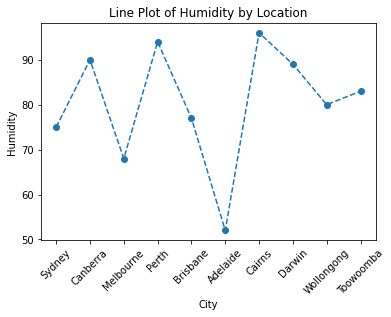

In [62]:
# line plot of humidity by location from api data
plt.plot(api_df.name, api_df.humidity, linestyle='dashed', marker='o')
plt.title("Line Plot of Humidity by Location")
# makes locations easier to read
plt.xticks(rotation = 45, fontsize=10)
plt.xlabel('City')
plt.ylabel('Humidity')
plt.show()

In [ ]:
# see attached word document for final summary